# 2P7 - Vector Calculus and PDEs
## Examples Paper 1 - Question 7

We first import some modules that we will need. You may not be familiar with "mplot3d" - this enables us to do a 3D plot.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

We now run the "magic" command that allows us to have plots in the notebook: "%matplotlib inline"
Note that this will give a static plot that you cannot interact with (e.g. rotate). You can try "%matplotlib notebook", or just "%matplotlib" - these work with some Jupyter servers and browsers and allow interaction.

In [2]:
%matplotlib inline

**myfield** - a function which returns the components of the B vector at the coordinates supplied as arguments.

*This function will run but is not complete.* You need to add definitions for the other fields in Q6.

In [18]:
def myfield( x, y, z ):

    field_definition = 2 # this is a switch variable for when you have more than one field option

    if field_definition == 0: # this is the field from Q6(i)
        Bx = -y
        By = x
        Bz = 0

    elif field_definition == 1:
        Bx = (2 * x * y) / (x**2 + y**2)**2
        By = -(2 * x * y) / (x**2 + y**2)**2
        Bz = 0

    elif field_definition == 2:
        Bx = 1 / x
        By = 1 / y
        Bz = -1 / (2 * z)


    # to allow for if x,y,z are arrays, but Bx, By or Bz is a constant
    if (np.size(Bx) == 1):
        Bx = Bx * np.ones( np.size(x) )
    if (np.size(By) == 1):
        By = By * np.ones( np.size(y) )
    if (np.size(Bz) == 1):
        Bz = Bz * np.ones( np.size(z) )

    return Bx, By, Bz # Return the field vector components at point (x,y,z)

**myfieldline** - a function to return arrays of coordinates of a field line.
The start coordinates and total length of the field line are arguments.
This function calls **myfield**.

*This function will not run* until you write code for
`Bny`, `Bnz`, `X[i]` and `Y[i]`

In [19]:
def myfieldline( x0, y0, z0, distance ):

    N = 100
    ds = float(distance) / N

    X = np.zeros(N)
    Y = np.zeros(N)
    Z = np.zeros(N)

    X[0] = x0
    Y[0] = y0
    Z[0] = z0

    for i in range(1,N):
        [Bx,By,Bz] = myfield( X[i-1], Y[i-1], Z[i-1] ) # Evaluate the field at the previous point (i-1)
        # Normalise the vector:
        magnitude = np.sqrt( Bx**2 + By**2 + Bz**2 )
        Bnx = Bx / magnitude
        Bny = By / magnitude
        Bnz = Bz / magnitude
        # Now evaluate the field line location at the current point (i)
        X[i] = X[i-1] + Bnx*ds
        Y[i] = Y[i-1] + Bny*ds
        Z[i] = Z[i-1] + Bnz*ds

    return X, Y, Z # Return the coordinates of the field line

The main part of our script plots the field lines.

*This function will not run* until you add code to generate the field line coordinates for each start point (x0,y0,z0)

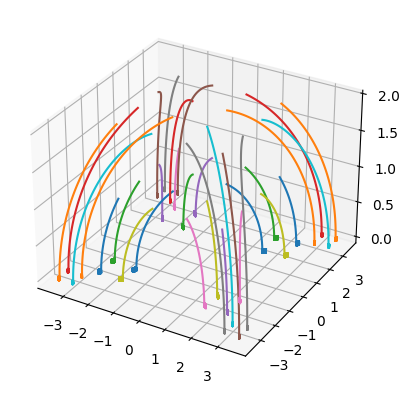

In [29]:
x_range = np.linspace(-2,2,4)
y_range = np.linspace(-2,2,4)
z_range = np.linspace(1,2,2)

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

for x0 in x_range:
    for y0 in y_range:
        for z0 in z_range:
            [X,Y,Z] = myfieldline(x0, y0, z0, 5)
            ax.plot(X,Y,Z)

plt.show()
